<a href="https://colab.research.google.com/github/isdebesl/projek-kelompok-5-orbit/blob/main/Ngorbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Memuat Repo Git



In [1]:
!git clone https://github.com/isdebesl/projek-kelompok-5-orbit

Cloning into 'projek-kelompok-5-orbit'...
remote: Enumerating objects: 5362, done.
remote: Counting objects: 100% (5360/5360), done.
remote: Compressing objects: 100% (5243/5243), done.
remote: Total 5362 (delta 93), reused 5344 (delta 86), pack-reused 2
Receiving objects: 100% (5362/5362), 1.17 GiB | 29.80 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (4638/4638), done.


# Mengimport library yang dibutuhkan

In [42]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.models import Model, Sequential
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import pickle
import random
import pathlib
import cv2

# Menginput model Pre-Train VGG19


In [43]:
!ls
model = keras.applications.vgg19.VGG19(weights='imagenet', include_top=True)

adw.jpg  awf.png      dataset.zip  features.p		    README.md  Testing
ahd.png  aye.jpg      dwd.png	   oa.png		    sa.png     uploaded
ah.jpg	 dataset      eh.jpg	   pro.ipynb		    static
awd.png  datasetrain  feature	   projek-kelompok-5-orbit  templates


In [44]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Data Preprocessing


In [45]:
!ls dataset

candi_arca_gupolo  candi_dieng	       candi_mendut	  candi_ratu_boko
candi_bahal	   candi_gedong_songo  candi_muara_takus  candi_sambisari
candi_banyunibo    candi_gunung_sari   candi_muaro_jambi  candi_sewu
candi_borobudur    candi_gunung_wukir  candi_pawon	  candi_sukuh
candi_brahu	   candi_jabung        candi_penataran
candi_cangkuang    candi_jago	       candi_plaosan
candi_cetho	   candi_kalasan       candi_prambanan


In [46]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


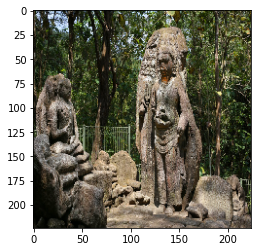

In [47]:
img, x = load_image("/content/projek-kelompok-5-orbit/dataset/candi_arca_gupolo/36556039260_8ed6b858b1_b-768x512.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

# Feature Extractor

In [48]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

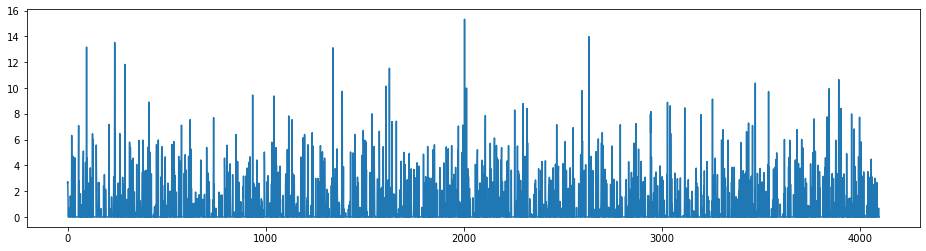

In [49]:
img, x = load_image("/content/projek-kelompok-5-orbit/dataset/candi_arca_gupolo/36556039260_8ed6b858b1_b-768x512.jpg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [83]:
images_path = '/content/projek-kelompok-5-orbit/dataset'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 4457 images to analyze


In [84]:
import time
tic = time.clock()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    print(image_path)
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


analyzing image 0 / 4457. Time: 0.0004 seconds.
/content/projek-kelompok-5-orbit/dataset/candi_pawon/ff-4.jpg
/content/projek-kelompok-5-orbit/dataset/candi_pawon/16907968_1273955522672503_4272152292284694528_n.jpg
/content/projek-kelompok-5-orbit/dataset/candi_pawon/210587-Candi-Pawon-Java.jpg
/content/projek-kelompok-5-orbit/dataset/candi_pawon/127179986_385342419444291_736607222225136743_n.jpg
/content/projek-kelompok-5-orbit/dataset/candi_pawon/image.jpeg
/content/projek-kelompok-5-orbit/dataset/candi_pawon/35616814_253837268504532_8128740088927485952_n.jpg
/content/projek-kelompok-5-orbit/dataset/candi_pawon/35001755_623859341312230_8567977512297037824_n.jpg
/content/projek-kelompok-5-orbit/dataset/candi_pawon/20184583_1235730929872185_6700089612427067392_n.jpg
/content/projek-kelompok-5-orbit/dataset/candi_pawon/30086501_148422422659594_1274106489354584064_n.jpg
/content/projek-kelompok-5-orbit/dataset/candi_pawon/147356258_3715299468562939_365705064874562297_n.jpg
/content/proje

# Mengurangi Dimensi (PCA)

In [88]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)

PCA(n_components=300)

In [89]:
pca_features = pca.transform(features)

# Modelling

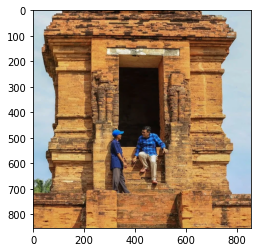

In [93]:
# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = image.load_img(images[query_image_idx])
plt.imshow(img)

In [72]:
path = pathlib.PurePath('/content/projek-kelompok-5-orbit/dataset/candi_arca_gupolo')
path.parent.name

'dataset'

In [73]:
def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    labels = []
    for idx in indexes:
        img = image.load_img(images[idx])

#        print(images[idx])
        path = pathlib.PurePath(images[idx])
        #print(path.parent.name)
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
        labels.append(path.parent.name)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image, labels


In [94]:
pick = open('features.p', 'rb')
data = pickle.load(pick)
pick.close()

In [74]:
def most_frequent(List):
    return max(set(List), key = List.count)

candi_dieng


Text(0.5, 1.0, 'result images')

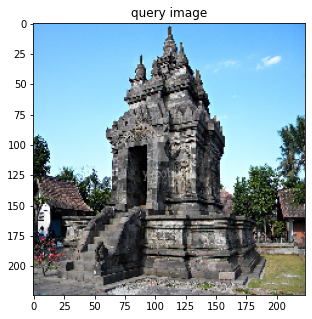

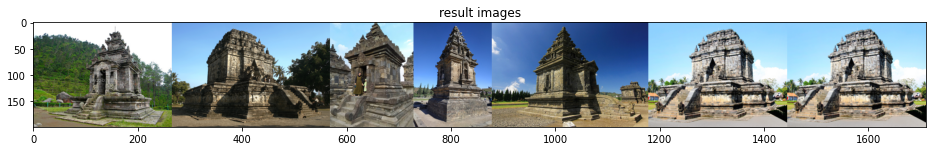

In [95]:
# load image and extract features
new_image, x = load_image("/content/projek-kelompok-5-orbit/datasetrain/candi_pawon/16024135760_083c13a25a_b.jpg")
new_features = feat_extractor.predict(x)

# project it into pca space
new_pca_features = data[2].transform(new_features)[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in data[1] ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:7]  # grab first 5
results_image, labels = get_concatenated_images(idx_closest, 200)
print(most_frequent(labels))
print(distances)

# display the results
plt.figure(figsize = (5,5))
plt.imshow(new_image)
plt.title("query image")

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

In [61]:
candi = {
    'candi_arca_gupolo': ['Candi Arca Gupolo', 'Sambi Rejo , Prambanan , Sleman , Daerah Istimewa Yogyakarta 55572 Madurejo Daerah Istimewa Yogyakarta', 'Buka 24 Jam', 4.3,'Budaya peninggalan hindu di dukuh gunung sari Desa sambirejo','./img/candi/arcagupolo.jpg'],
    'candi_bahal': ['Candi Bahal', 'Desa Bahal, Padang Bolak, Sibatu Loting, Kec. Barumun Tengah, Kabupaten Padang Lawas Utara, Sumatera Utara 22741, Indonesia', 'Setiap Hari 06.00-18.00',4.2 ,'Sejarah bangsa ada disini','./img/candi/bahal.JPG'],
    'candi_banyunibo': ['Candi Banyunibo', 'Cepit, Bokoharjo, Kec. Prambanan, Kabupaten Sleman, Daerah Istimewa Yogyakarta 55572, Indonesia', 'Setiap Hari  06.00 – 17.00', 4.5,'Selain wisata budaya, anak atau keluarga dapat dikenalkan dengan alam.','./img/candi/banyunibo.jpg'],
    'candi_borobudur': ['Candi Borobudur', 'Jl. Badrawati, Kw. Candi Borobudur, Borobudur, Kec. Borobudur, Kabupaten Magelang, Jawa Tengah.', 'Setiap Hari, 06:30 - 16:30', 4.5 ,'Tempat wisata, belajar sejarah, juga terdapat pasar untuk berbelanja buah tangan','./img/candi/borobudur.jpg'],
    'candi_brahu': ['Candi Brahu', ' Jl. Candi Brahu No.73, Siti Inggil, Bejijong, Kec. Trowulan, Kabupaten Mojokerto, Jawa Timur 61362, Indonesia', 'Setiap Hari  06.00 – 18.00', 4.6 ,'Sejarah anyaman terbentunya Generasi Bangsa dan Tanah Air.','./img/candi/brahu.jpg'],
    'candi_cangkuang': ['Candi Cangkuang', 'Jalan Darajat Leuwigoong, Cangkuang, Kec. Leles, Kabupaten Garut, Jawa Barat 44119, Indonesia', 'Setiap Hari  07.30 – 17.00', 4.4,'Fasilitas bagooss, suasana adeem, bagus buat edukasi tentang sejarah','./img/candi/cangkuang.jpg'],
    'candi_cetho': ['Candi Cetho', 'Dukuh, Cetho, Gumeng, Kec. Jenawi, Kabupaten Karanganyar, Jawa Tengah 57794, Indonesia', 'Setiap Hari  08.00 – 17.00', 4.7 ,'Buat yg suka pemandangan situs sejarah diatasi bukit bisa jadi rekomendasi nih','./img/candi/cetho.jpg'],
    'candi_dieng': ['Candi Dieng', 'Dataran Tinggi Dieng, Kabupaten Banjarnegara, Jawa Tengah, Indonesia', 'Buka 24 Jam', 4.6,'Candi peninggalan sejarah, yg sering digunakan utuk upacara adat di Dieng','./img/candi/dieng.jpg'],
    'candi_gedong_songo': ['Candi Gedong Songo', 'Jalan Ke Candi Gedong Songo, Candi, Krajan, Banyukuning, Bandungan, Kabupaten Semarang, Jawa Tengah 50614, Indonesia', 'Setiap hari  07.00 – 17.00', 4.5,'Mantab untuk belajar seJarah, bisa sewa kuda kaya orang jaman dulu.','./img/candi/gedongsongo.jpg'],
    'candi_gunung_sari': ['Candi Gunung Sari', ' Gunungsari, Gulon, Salam, Kuncen, Seloboro, Kec. Salam, Kabupaten Magelang, Jawa Tengah 56484, Indonesia', 'Setiap hari  07.00 – 17.00', 4.3 ,'"Candinya di atas bukit, jalan masuknya melewati pemakaman umum dan hutan bambu."','./img/candi/gunungsari.jpg'],
    'candi_gunung_wukir': ['Candi Gunung Wukir', 'Canggal, Kadiluwih, Salam, Area Kebun, Kadiluwih, Kec. Salam, Kabupaten Magelang, Jawa Tengah 56484, Indonesia', 'Setiap hari  08.00 – 17.00', 4.4 ,'Candi yg terletak di atas bukit ,suasana sepi melintasi hutan bambu','./img/candi/gunungwukir.jpg'],
    'candi_jabung': ['Candi Jabung', 'Dusun Candi, Jabung Candi, Kec. Paiton, Kabupaten Probolinggo, Jawa Timur 67291, Indonesia', 'Setiap Hari  06.00 – 18.00', 4.4 ,'Semoga ada fasilitas untuk cuci tangan agar pengunjung bisa mengikuti prokes.','./img/candi/jabung.jpg'],
    'candi_jago': ['Candi Jago', ' Jl. Wisnuwardhana, Ronggowuni, Tumpang, Kec. Tumpang, Kabupaten Malang, Jawa Timur 65156, Indonesia', 'Setiap Hari  07.30 – 16.00', 4.6 ,'Cagar budaya daerah tumpang, kebersihan taman okay, toilet kurang bersih','./img/candi/jago.jpg'],
    'candi_kalasan': ['Candi Kalasan', ' Jl. Raya Yogya - Solo, Suryatmajan, Danurejan, Daerah Istimewa Yogyakarta, Indonesia', 'Setiap hari  07.00 – 17.00', 4.5,'Mahakarya masyarakat indonesia jaman dulu Semoga tetap terjaga kelestarianya','./img/candi/kalasan.jpg'],
    'candi_mendut': ['Candi Mendut', 'Jl. Mayor Kusen, Sumberrejo, Mendut, Kec. Mungkid, Kabupaten Magelang, Jawa Tengah 56501, Indonesia', 'Setiap hari  07.00 – 19.00', 4.6,'Candi dengan taman yang bagus..ngopi di bawah pohon suasana santai','./img/candi/mendut.jpg'],
    'candi_muara_takus': ['Candi Muara Takus', 'Muara Takus, Kec. XIII Koto Kampar, Kabupaten Kampar, Riau 28453, Indonesia', 'Setiap Hari  08.00 – 18.00', 4.3,'Ini memandakan bahwa jauh sebelum Islam ada di Riau, ada umat hindu/ budha"','./img/candi/muaratakus.jpg'],
    'candi_muaro_jambi': ['Candi Muaro Jambi', 'Muaro Jambi, Kec. Maro Sebo, Kabupaten Muaro Jambi, Jambi 36382, Indonesia', 'Setiap Hari  08.00 – 18.00', 4.5,'Tempat wisata cagar alam yang bagus untuk dikunjungi di muara Jambi (Kota Jambi)','./img/candi/muarojambi.jpg'],
    'candi_pawon': ['Candi Pawon', 'Brojonalan, Dusun 1, Wanurejo, Kec. Borobudur, Kabupaten Magelang, Jawa Tengah 56553, Indonesia', 'Setiap Hari  09.00–17.30', 4.4 ,'Eksotis sekali Candinya, memperlihatkan kesempurnaan Peradaban Leluhur Nusantara pada eranya. Nuansa klasiknya terasa sekali, terlihat di reliefnya.','./img/candi/pawon.jpg'],
    'candi_penataran': ['Candi Penataran', 'Penataran, Kec. Nglegok, Kabupaten Blitar, Jawa Timur 66181, Indonesia', 'Setiap Hari  08.00 – 17.00', 4.5,'Tempat wisata sejarah bangsa Indonesia yg bagus yg ada di Blitar.','./img/candi/penataran.jpg'],
    'candi_plaosan': ['Candi Plaosan', ' Jl. Candi Plaosan, Plaosan Lor, Bugisan, Kec. Prambanan, Kabupaten Klaten, Jawa Tengah 57454, Indonesia', 'Setiap Hari  08.00 – 16.00', 4.6,'Situs warisan budaya berupa candi Hindu-Buddha di Jawa.','./img/candi/plaosan.jpg'],
    'candi_prambanan': ['Candi Prambanan', ' Jl. Raya Solo - Yogyakarta No.16, Kranggan, Bokoharjo, Kec. Prambanan, Kabupaten Sleman, Daerah Istimewa Yogyakarta 55571, Indonesia', 'Setiap Hari  06.30 – 17.00', 4.7,'Tempat wisata yang bagus untuk belajar sejarah agama Hindu di Indonesia.','./img/candi/prambanan.jpg'],
    'candi_ratu_boko': ['Candi Ratu Boko', ' Jl. Raya Piyungan - Prambanan No.2, Gatak, Bokoharjo, Kec. Prambanan, Kabupaten Sleman, Daerah Istimewa Yogyakarta 5572, Indonesia', 'Setiap Hari  08.00 – 17.00', 4.6,'Yg doyan olahraga bisa juga nih lewat belakang jalur bis/mobil hehe','./img/candi/ratuboko.jpg'],
    'candi_sambisari': ['Candi Sambisari', 'Jl. Candi Sambisari, Sambisari, Purwomartani, Kec. Kalasan, Kabupaten Sleman, Daerah Istimewa Yogyakarta 55571, Indonesia', 'Setiap hari  07.00 – 17.00', 4.6,'Bagus untuk pengetahuan sejarah dan budaya leluhur Bangsa Indonesia.','./img/candi/sambisari.jpg'],
    'candi_sewu': ['Candi Sewu', 'Jl. Raya Solo - Yogyakarta No.KM.16, Bugisan, Kec. Prambanan, Kabupaten Sleman, Daerah Istimewa Yogyakarta, Indonesia', 'Setiap hari  06.00 – 17.00', 4.6 ,'Sangat bagus untuk wisata dan belajar sejarah dan budaya','./img/candi/sewu.jpg'],
    'candi_sukuh': ['Candi Sukuh', ' Tambak, Berjo, Kec. Ngargoyoso, Kabupaten Karanganyar, Jawa Tengah 57793, Indonesia', 'Setiap hari  07.00 – 15.00', 4.6,'Tujuan wisata yg asri dan suasana yg adem krna posisi di kaki gunung lawu','./img/candi/sukuh.jpg']
    
        }

In [76]:
def predict(image_path):
    new_image, x = load_image(image_path)
    new_features = feat_extractor.predict(x)

    # project it into pca space
    new_pca_features = data[2].transform(new_features)[0]

    # calculate its distance to all the other images pca feature vectors
    distances = [ distance.cosine(new_pca_features, feat) for feat in data[1] ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:7]  # grab first 5
    results_image, labels = get_concatenated_images(idx_closest, 200)
    candi_predict = most_frequent(labels)
    candi_data = candi[candi_predict]
    return candi_predict

# Evaluasi


In [96]:
images_path_train = '/content/projek-kelompok-5-orbit/datasetrain/'
max_num_images = 10000

images_train = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path_train) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images_train):
    images_train = [images_train[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images_train))

keeping 126 images to analyze


In [64]:
print(images_train)

['/content/projek-kelompok-5-orbit/datasetrain/candi_pawon/36444995384_b272f20ade_4k.jpg', '/content/projek-kelompok-5-orbit/datasetrain/candi_pawon/8005993178_e1e3f4789f_z.jpg', '/content/projek-kelompok-5-orbit/datasetrain/candi_pawon/23231065934_241b01d7a9_c.jpg', '/content/projek-kelompok-5-orbit/datasetrain/candi_pawon/16024135760_083c13a25a_b.jpg', '/content/projek-kelompok-5-orbit/datasetrain/candi_pawon/8469838340_812ca4a32b.jpg', '/content/projek-kelompok-5-orbit/datasetrain/candi_borobudur/https _asset.kgnewsroom.com_photo_pre_2022_06_14_3bff2380-c8c1-408a-9772-1b1113016c1e_jpg.jpg', '/content/projek-kelompok-5-orbit/datasetrain/candi_borobudur/2964074136_f17ede4ca2_c.jpg', '/content/projek-kelompok-5-orbit/datasetrain/candi_borobudur/49745689837_4ce9c07d65_c.jpg', '/content/projek-kelompok-5-orbit/datasetrain/candi_borobudur/52107_candi-borobudur.jpg', '/content/projek-kelompok-5-orbit/datasetrain/candi_borobudur/a437ac16d01a29ec8bd5c7e0ead8f4b8.jpg', '/content/projek-kelomp

In [79]:
df_eval = pd.DataFrame()

In [97]:
import pandas as pd
column_names = ["path", "label","predicted"]
df_eval = pd.DataFrame(columns = column_names)
  

In [98]:
for gambar in images_train:
  df_eval = df_eval.append({'path': gambar, 'label': pathlib.PurePath(gambar).parent.name}, ignore_index=True)

  

In [99]:

for index, col in df_eval.iterrows():
    label = predict(col['path'])
    df_eval.at[index,'predicted'] = label
    print(index)
    print(col['path'])
    print(label)

0
/content/projek-kelompok-5-orbit/datasetrain/candi_pawon/36444995384_b272f20ade_4k.jpg
candi_plaosan
1
/content/projek-kelompok-5-orbit/datasetrain/candi_pawon/8005993178_e1e3f4789f_z.jpg
candi_pawon
2
/content/projek-kelompok-5-orbit/datasetrain/candi_pawon/23231065934_241b01d7a9_c.jpg
candi_pawon
3
/content/projek-kelompok-5-orbit/datasetrain/candi_pawon/16024135760_083c13a25a_b.jpg
candi_dieng
4
/content/projek-kelompok-5-orbit/datasetrain/candi_pawon/8469838340_812ca4a32b.jpg
candi_pawon
5
/content/projek-kelompok-5-orbit/datasetrain/candi_borobudur/https _asset.kgnewsroom.com_photo_pre_2022_06_14_3bff2380-c8c1-408a-9772-1b1113016c1e_jpg.jpg
candi_sewu
6
/content/projek-kelompok-5-orbit/datasetrain/candi_borobudur/2964074136_f17ede4ca2_c.jpg
candi_muara_takus
7
/content/projek-kelompok-5-orbit/datasetrain/candi_borobudur/49745689837_4ce9c07d65_c.jpg
candi_borobudur
8
/content/projek-kelompok-5-orbit/datasetrain/candi_borobudur/52107_candi-borobudur.jpg
candi_borobudur
9
/content/

In [100]:
df_eval

,path,label,predicted
0,/content/projek-kelompok-5-orbit/datasetrain/c...,candi_pawon,candi_plaosan
1,/content/projek-kelompok-5-orbit/datasetrain/c...,candi_pawon,candi_pawon
2,/content/projek-kelompok-5-orbit/datasetrain/c...,candi_pawon,candi_pawon
3,/content/projek-kelompok-5-orbit/datasetrain/c...,candi_pawon,candi_dieng
4,/content/projek-kelompok-5-orbit/datasetrain/c...,candi_pawon,candi_pawon
...,...,...,...
121,/content/projek-kelompok-5-orbit/datasetrain/c...,candi_banyunibo,candi_banyunibo
122,/content/projek-kelompok-5-orbit/datasetrain/c...,candi_banyunibo,candi_banyunibo
123,/content/projek-kelompok-5-orbit/datasetrain/c...,candi_banyunibo,candi_banyunibo
124,/content/projek-kelompok-5-orbit/datasetrain/c...,candi_banyunibo,candi_banyunibo


In [101]:
y_true = df_eval["label"].values
y_pred = df_eval["predicted"].values

accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.6825396825396826


# Menyimpan Model (Pickle)

In [92]:
import pickle

pickle.dump([images, pca_features, pca], open('/content/projek-kelompok-5-orbit/features.p', 'wb'))